# Analyzing Seattle's Airbnb data

In this project we will be analyzing Airbnb's data for the location of Seattle, Washington (USA) and answering a few questions relevant to the business. 

Dataset's source: https://www.kaggle.com/airbnb/seattle

## Business Understanding

Our main focus will be around the price of the listings available in Seattle and what other factors can influence it. We will answer the following three questions -

1. What is the average price of the listings in Seattle each month?

2. What is the correlation between price of a listing, the amenities/services that listing offers, and the reviews of that listing?

3. Which property types have the highest average price?

Each of these questions can help understand certain patterns that we could potentially use to improve our pricing model.

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

## Data Understanding

We will explore the dataset next. Findings relevant to the dataset are reported at the end of this section.

In [2]:
# load the data

calendar = pd.read_csv("data/calendar.csv")
listings = pd.read_csv("data/listings.csv")
reviews = pd.read_csv("data/reviews.csv")

In [3]:
# basic info for each dataset

print("Calendar Info: ")
calendar.info();

Calendar Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
print("Listings Info: ")
listings.info();

Listings Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url          

In [5]:
print("Reviews Info: ")
reviews.info();

Reviews Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


Next we will explore some data and summary statistics from each dataframe

#### Calendar

In [6]:
calendar.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [7]:
# some summary statistics
pd.set_option('display.float_format', '{:.2f}'.format)
calendar.describe()

,listing_id
count,1393570.00
mean,5550111.42
std,2962273.53
min,3335.00
25%,3258213.00
50%,6118244.50
75%,8035212.00
max,10340165.00


#### Listings

In [8]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.00,f,nan,WASHINGTON,f,moderate,f,f,2,4.07


In [9]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3818.00,3818.00,3818.00,3816.00,3816.00,3818.00,3818.00,3818.00,3802.00,3812.00,...,3171.00,3160.00,3165.00,3160.00,3167.00,3163.00,3162.00,0.00,3818.00,3191.00
mean,5550111.42,20160104002432.00,15785555.11,7.16,7.16,47.63,-122.33,3.35,1.26,1.31,...,94.54,9.64,9.56,9.79,9.81,9.61,9.45,nan,2.95,2.08
std,2962660.48,0.00,14583815.27,28.63,28.63,0.04,0.03,1.98,0.59,0.88,...,6.61,0.70,0.80,0.60,0.57,0.63,0.75,nan,5.89,1.82
min,3335.00,20160104002432.00,4193.00,1.00,1.00,47.51,-122.42,1.00,0.00,0.00,...,20.00,2.00,3.00,2.00,2.00,4.00,2.00,nan,1.00,0.02
25%,3258256.25,20160104002432.00,3275204.00,1.00,1.00,47.61,-122.35,2.00,1.00,1.00,...,93.00,9.00,9.00,10.00,10.00,9.00,9.00,nan,1.00,0.69
50%,6118244.50,20160104002432.00,10558142.00,1.00,1.00,47.62,-122.33,3.00,1.00,1.00,...,96.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,1.00,1.54
75%,8035126.75,20160104002432.00,25903093.25,3.00,3.00,47.66,-122.31,4.00,1.00,2.00,...,99.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,2.00,3.00
max,10340165.00,20160104002432.00,53208610.00,502.00,502.00,47.73,-122.24,16.00,8.00,7.00,...,100.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,37.00,12.15


#### Reviews

In [10]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


Since `reviews` only consists of numerical columns for different ids, there is no use for summary statistics and we can ignore those. Also, `reviews` dataframe doesn't have any quantifiable information that we can use to answer our questions. So, we won't consider the dataset at all.

The 

We will look at the `calendar` dataset first, and check the date range for our records.

In [11]:
# print oldest and latest date from calendar

print(min(calendar["date"]), max(calendar["date"]))

2016-01-04 2017-01-02


So our data is from 4th January 2016, to 2nd January 2017. 

## Data Preparation

We'll start exploring more of the datasets and prepare them to be able to effectively answer the questions we posed previously.

The `price` column has some NaNs. Let's check if they can be removed or if those are dependent on whether or not the listing is available.

In [12]:
# print number of NaN rows for `price` where `available` is `t`

print(calendar[(calendar["price"].isnull()) & (calendar["available"] == 't')])

Empty DataFrame
Columns: [listing_id, date, available, price]
Index: []


So, the pricing is null when the listing is not available. We can then disregard the `available` column. Let's create a copy of the dataset and clean up based on what we have explored so far. We will also convert the `price` column into a float dtype, and the `date` column into datetime

In [13]:
# create copy of dataset
calendar_clean = calendar.copy()

# drop column
calendar_clean = calendar_clean.drop(columns=["available"])

# convert date column to datetime type
calendar_clean["date"]= pd.to_datetime(calendar_clean["date"], format='%Y-%m-%d')

# convert price from string to float
calendar_clean["price"] = calendar_clean["price"].str.replace("$","").str.replace(",","").astype(float)

# rename price column name to price_dollars
calendar_clean.rename(columns ={"price":"price_dollars"}, inplace=True)
print(calendar_clean.head(2))
calendar_clean.info()

   listing_id       date  price_dollars
0      241032 2016-01-04          85.00
1      241032 2016-01-05          85.00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 3 columns):
listing_id       1393570 non-null int64
date             1393570 non-null datetime64[ns]
price_dollars    934542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 31.9 MB


Let's check number of unique listings and also how many NaN prices there are. We can then decide to remove the NaN records accordingly

In [14]:
# unique listings 
print(calendar_clean["listing_id"].unique().shape[0])

# average listings per listing id
print(calendar_clean.groupby("listing_id").size().sort_values(ascending=True))

# NaN prices
print(calendar_clean["price_dollars"].isnull().value_counts())

# Number of NaN prices per listing id
nan_price_per_listing = calendar_clean.groupby("listing_id").apply(lambda x: x["price_dollars"].isnull().sum())
print(nan_price_per_listing)

3818
listing_id
3335        365
7483750     365
7492006     365
7492877     365
7496485     365
           ... 
4122325     365
4125779     365
4126284     365
4104442     365
10340165    365
Length: 3818, dtype: int64
False    934542
True     459028
Name: price_dollars, dtype: int64
listing_id
3335         56
4291          0
5682         56
6606          0
7369        312
           ... 
10332096      0
10334184      4
10339144    365
10339145      0
10340165      7
Length: 3818, dtype: int64


In [15]:
# listings with more than 300 missing prices
print(nan_price_per_listing[nan_price_per_listing[nan_price_per_listing.index] > 300])

listing_id
7369        312
9460        308
53867       345
107046      365
107962      328
           ... 
10250735    361
10252110    346
10299195    351
10319529    364
10339144    365
Length: 480, dtype: int64


So, each listing has records for each day of the year. There are some listings which don't have a price for most, if not all, days of the year (that is, they are unavailable). But even then, there are quite a lot of listings which are unavailable for large chunks of the year.

We create a new column in `calendar` that contains the month extracted from the date column. This will allow us to answer our first question.

In [16]:
# create new column to store month information
calendar_clean["month"] = calendar_clean["date"].dt.month

Next, we'll look at the `listings` dataset. That dataset has a total of 92 columns, and quite a few of them are not needed. We will begin by removing columns which - 

- contain descriptive text (like comments, and details about the neighborhood etc)
- contain urls
- are not required to answer our questions (like the geography-based columns)
- contain a large number of null values

In [17]:
# create list of columns to drop
listings_col_to_drop = ["listing_url", "scrape_id", "last_scraped", "summary", "space", "description", 
                        "experiences_offered", "neighborhood_overview", "notes", "host_location", "host_about",
                        "street", "city", "state", "zipcode","neighbourhood","neighbourhood_cleansed",
                        "neighbourhood_group_cleansed","first_review","last_review","host_name",
                        "country_code", "country", "latitude", "longitude","jurisdiction_names",
                        "calendar_last_scraped","calendar_updated","name"
]

# iterate over columns to identify url columns and add to above list

for col in listings.columns:
    if "url" in col:
        listings_col_to_drop.append(col)
        
# remove columns with lots of null values
listings_col_to_drop.append("square_feet")
listings_col_to_drop.append("license")

listings_clean = listings.drop(columns = listings_col_to_drop)

print(listings_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 54 columns):
id                                  3818 non-null int64
transit                             2884 non-null object
host_id                             3818 non-null int64
host_since                          3816 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_acceptance_rate                3045 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518 non-null object
host_listings_count                 3816 non-null float64
host_total_listings_count           3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
market                              3818 non-null object
smart_location                      38

Some columns above need to be converted from object (string) to integer or float to allow us to find correlation between the features in a better way. Most of these are related to `price`.

In [18]:
# convert string price related columns to float types
listings_clean["price"] = listings_clean["price"].str.replace("$","").str.replace(",","").astype(float)
listings_clean["weekly_price"] = listings_clean["weekly_price"].str.replace("$","").str.replace(",","").astype(float)
listings_clean["monthly_price"] = listings_clean["monthly_price"].str.replace("$","").str.replace(",","").astype(float)

In [19]:
listings_clean.head(1)

,id,transit,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,NaN,956883,2011-08-11,within a few hours,96%,100%,f,Queen Anne,3.00,...,10.00,9.00,10.00,f,f,moderate,f,f,2,4.07


Eventually, we wish to find the correlation between prices and amenities. However, the `amenities` column consists of strings of amenities offered at the listing.

In [20]:
# set pandas option to display entire column width
pd.set_option('display.max_colwidth', -1)
listings_clean.loc[1:4,"amenities"]

1    {TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}                                                
2    {TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}
3    {Internet,"Wireless Internet",Kitchen,"Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Safety Card","Fire Extinguisher",Essentials,Shampoo}                                                                                              
4    {TV,"Cable TV",Internet,"Wireless Internet",Kitchen,Heating,"Family/Kid Friendly","Smoke Detector","Carb

Each listing has a variable number of amenities. We will extract these amenities and create separate columns for each indicating whether or not that amenity is present for that listing or not.

First, we will conver the strings into a list of the amenities. And then we will extract all the unique amenities from the `amenities` column.

In [21]:
# convert string for each row into a list of the items in the string.

amenities_lst = []
for row in listings_clean["amenities"]:
    row=row.replace("{","")
    row=row.replace("}","")
    row=row.replace("\"","")
    amenities_lst.append(row.split(","))

# extract unique amenities
unique_amenities = set()
for items in amenities_lst:
    for item in items:
        unique_amenities.add(item)
print(unique_amenities)
print(len(unique_amenities))

{'', 'Washer', 'TV', 'Hangers', 'Heating', 'Pets live on this property', 'Free Parking on Premises', 'Safety Card', 'Family/Kid Friendly', 'Shampoo', 'Internet', 'Air Conditioning', 'Other pet(s)', 'Elevator in Building', 'Pool', 'Laptop Friendly Workspace', 'Lock on Bedroom Door', 'Indoor Fireplace', 'Buzzer/Wireless Intercom', 'Smoking Allowed', 'Cable TV', 'Wireless Internet', 'Smoke Detector', 'Essentials', 'Cat(s)', 'Gym', 'Wheelchair Accessible', 'Breakfast', 'Doorman', 'Dryer', 'Suitable for Events', 'First Aid Kit', 'Carbon Monoxide Detector', 'Fire Extinguisher', 'Hair Dryer', 'Iron', 'Dog(s)', 'Washer / Dryer', '24-Hour Check-in', 'Hot Tub', 'Pets Allowed', 'Kitchen'}
42


There are quite a few unique amenities. We will create new columns for each of the above, where the rows will indicate whether the amenity is present for a particular listing (1) or not (0).

In [22]:
# Personal ToDo - Find a more efficient way to implement the following
for idx,row in enumerate(amenities_lst):
    for amenity in unique_amenities:
        if amenity in row:
            listings_clean.loc[idx, amenity] = 1
        else:
            listings_clean.loc[idx, amenity] = 0

listings_clean.head(1)

,id,transit,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,Carbon Monoxide Detector,Fire Extinguisher,Hair Dryer,Iron,Dog(s),Washer / Dryer,24-Hour Check-in,Hot Tub,Pets Allowed,Kitchen
0,241032,NaN,956883,2011-08-11,within a few hours,96%,100%,f,Queen Anne,3.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


Now that we have amenities as their own columns, we can use them to find correlation with price.

Next, we will look at property types and check if there is any problem with the data corresponding to each types or not.

In [23]:
listings_clean["property_type"].describe()

count     3817 
unique    16   
top       House
freq      1733 
Name: property_type, dtype: object

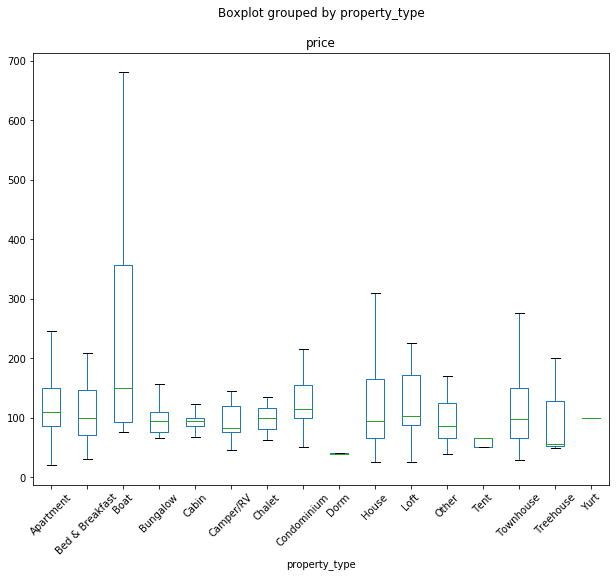

In [24]:
#listings_clean.groupby("property_type")["price"].mean().sort_values(ascending=False).plot.bar()
listings_clean.boxplot("price", by = "property_type", showfliers=False, rot=45, figsize=(10,8), grid = False)

There are some properties that don't have many records associated with them. We will check the number of records for each and then drop those rows accordingly.

In [25]:
# count number of rows for Dorm, Tent, and Yurt property types
print("Dorm Rows: ", listings_clean[listings_clean["property_type"] == "Dorm"].shape[0])
print("Tent Rows: ", listings_clean[listings_clean["property_type"] == "Tent"].shape[0])
print("Yurt Rows: ", listings_clean[listings_clean["property_type"] == "Yurt"].shape[0])

# drop rows corresponding to the above 3

listings_clean.drop(listings_clean[listings_clean["property_type"] == "Dorm"].index, inplace=True)
listings_clean.drop(listings_clean[listings_clean["property_type"] == "Tent"].index, inplace=True)
listings_clean.drop(listings_clean[listings_clean["property_type"] == "Yurt"].index, inplace=True)

listings_clean["property_type"].unique()

Dorm Rows:  2
Tent Rows:  5
Yurt Rows:  1


array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Treehouse', 'Chalet', nan], dtype=object)

There are still rows with NaN values. Let's check how many

In [26]:
print("Number of NaNs: ", listings_clean[listings_clean["property_type"].isnull()].shape[0])

# drop the row
listings_clean.dropna(subset = ["property_type"], inplace = True)

listings_clean["property_type"].unique()


Number of NaNs:  1


array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Treehouse', 'Chalet'], dtype=object)

This covers our data cleaning and preparation process. There is lot more that can be done, but since the focus is around answering specific business questions, we don't have to delve into more prep work.

## Answering Business Questions (Evaluation)

Now that we have cleaned up and prepared our data, we can use it to answer our business questions.

### 1. What is the average price of the listings in Seattle each month?

We previously identified that there were listings that were unavailable and therefore their prices were not available as well. So, for this question, we will not count the NaN prices for those listings.

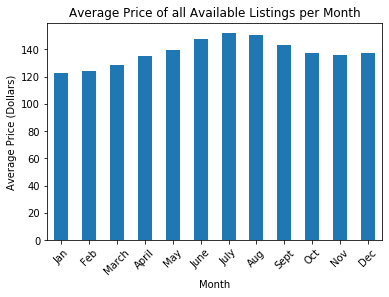

In [27]:
calendar_clean.groupby("month")["price_dollars"].mean().plot.bar()
xticks_labels = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov","Dec"]
xticks_pos = list(range(0,12))
plt.xlabel("Month")
plt.xticks(xticks_pos, xticks_labels, rotation=45)
plt.ylabel("Average Price (Dollars)")
plt.title("Average Price of all Available Listings per Month");

In [28]:
# print out the average price per month
price_per_month = calendar_clean.groupby("month")["price_dollars"].mean()
price_per_month.index = xticks_labels
price_per_month

Jan     122.91
Feb     124.29
March   128.64
April   135.10
May     139.54
June    147.47
July    152.09
Aug     150.66
Sept    143.26
Oct     137.03
Nov     135.69
Dec     137.25
Name: price_dollars, dtype: float64

So, we see the average price of the listings being higher during the Summer-Fall months. With the top-3 being for  July (152.09 dollars), and August (150.66 dollars), June (147.47 dollars).

### 2. What is the correlation between price of a listing, the amenities/services that listing offers, and the reviews of that listing?


So, we will use specific columns from the `listings_clean` dataset to find this correlation.

In [29]:
listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3809 entries, 0 to 3817
Data columns (total 96 columns):
id                                  3809 non-null int64
transit                             2877 non-null object
host_id                             3809 non-null int64
host_since                          3807 non-null object
host_response_time                  3290 non-null object
host_response_rate                  3290 non-null object
host_acceptance_rate                3040 non-null object
host_is_superhost                   3807 non-null object
host_neighbourhood                  3509 non-null object
host_listings_count                 3807 non-null float64
host_total_listings_count           3807 non-null float64
host_verifications                  3809 non-null object
host_has_profile_pic                3807 non-null object
host_identity_verified              3807 non-null object
market                              3809 non-null object
smart_location                      38

Based on the above, we won't be considering all price-related columns because of significant missing values. We will consider the `price` column, the columns corresponding to the various amenities, and certain reviews related columns.

In [30]:
corr_columns = ["price","bathrooms","bedrooms","beds",
                             "number_of_reviews","review_scores_rating", "review_scores_value"]

# add amenities columns
unique_amenities_lst = list(unique_amenities)
corr_columns.extend(unique_amenities_lst)
price_corr = listings_clean[corr_columns]
price_corr = price_corr.drop(columns=[""])

print(price_corr.info())
price_corr.head(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3809 entries, 0 to 3817
Data columns (total 48 columns):
price                         3809 non-null float64
bathrooms                     3793 non-null float64
bedrooms                      3803 non-null float64
beds                          3808 non-null float64
number_of_reviews             3809 non-null int64
review_scores_rating          3164 non-null float64
review_scores_value           3155 non-null float64
Washer                        3809 non-null float64
TV                            3809 non-null float64
Hangers                       3809 non-null float64
Heating                       3809 non-null float64
Pets live on this property    3809 non-null float64
Free Parking on Premises      3809 non-null float64
Safety Card                   3809 non-null float64
Family/Kid Friendly           3809 non-null float64
Shampoo                       3809 non-null float64
Internet                      3809 non-null float64
Air Conditi

,price,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_value,Washer,TV,Hangers,...,Carbon Monoxide Detector,Fire Extinguisher,Hair Dryer,Iron,Dog(s),Washer / Dryer,24-Hour Check-in,Hot Tub,Pets Allowed,Kitchen
0,85.00,1.00,1.00,1.00,207,95.00,10.00,1.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


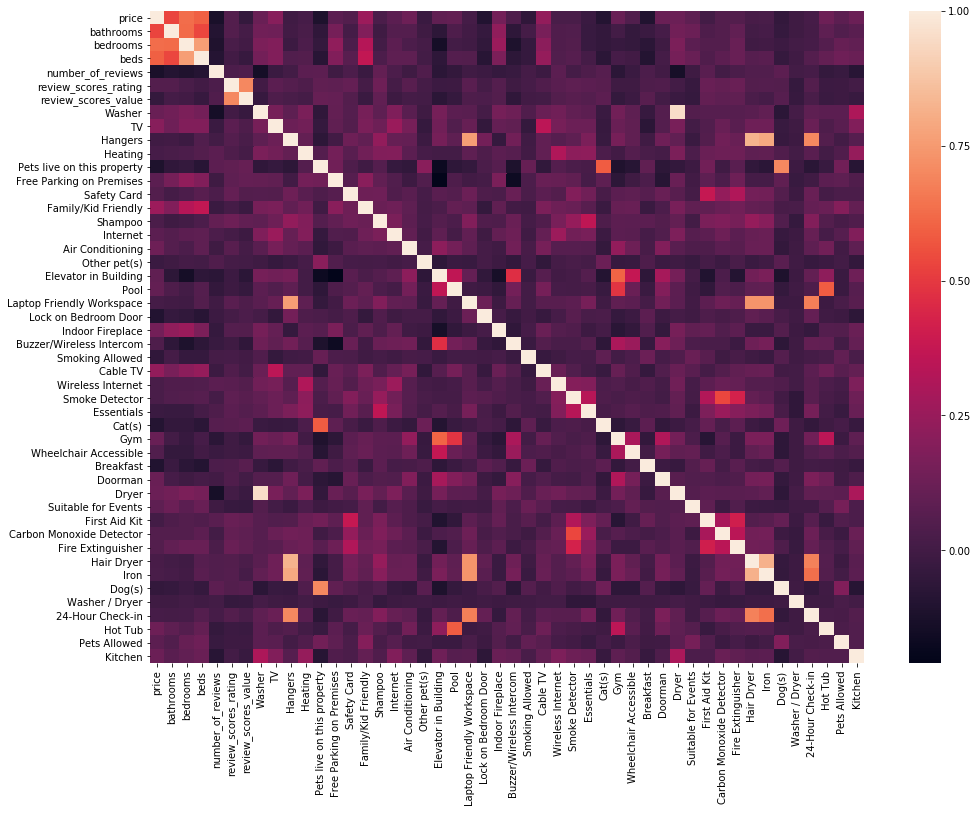

In [31]:
# plot heatmap
fig, ax = plt.subplots(figsize=(16,12))
sb.heatmap(price_corr.corr())

In [32]:
# Printing out the top 10 (including price) variables positively correlated with price
price_corr.corr()["price"].sort_values(ascending=False).nlargest(10)

price                 1.00
bedrooms              0.63
beds                  0.60
bathrooms             0.53
Family/Kid Friendly   0.26
Cable TV              0.24
TV                    0.20
Indoor Fireplace      0.15
Air Conditioning      0.13
Hot Tub               0.13
Name: price, dtype: float64

There are some strong positive correlations between the price and the number of bathrooms, bedrooms, and beds. However, it's interesting to see that there is no strong correlation between the price and any particular amenity, relatively speaking. 

Review scores ratings have a much lower positive correlation to the price as well.

There are still positive correlations between the price and the amenities, with "Cable TV" and "Family/Kid Friendly" being the highest.

### 3. Which property types have the highest average price?

We will look at the average price across different property types for the final question.

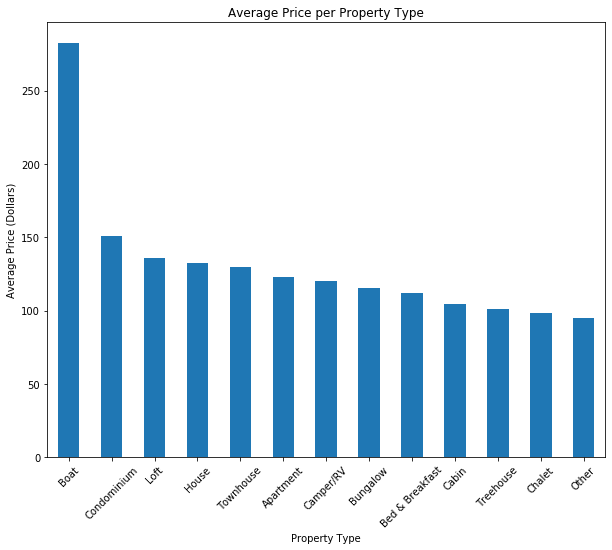

In [33]:
fig, ax = plt.subplots(figsize=(10,8))

listings_clean.groupby("property_type")["price"].mean().sort_values(ascending=False).plot.bar()
plt.xlabel("Property Type")
plt.ylabel("Average Price (Dollars)")
plt.title("Average Price per Property Type")
plt.xticks(rotation=45);

In [34]:
# Top 3 property types based on average price
listings_clean.groupby("property_type")["price"].mean().nlargest(3)

property_type
Boat          282.38
Condominium   151.11
Loft          135.70
Name: price, dtype: float64

We can clearly see that listings where the property is a boat have the highest average price of about 282 dollars. Followed by Condominium (151 dollars) and Loft (136 dollars).